<a href="https://colab.research.google.com/github/Ilyass-Dahaoui/ML-For-Physical-Exercise-Recognition/blob/main/ML_for_Physical_Exercise_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhannadtuameh/exercise-recognition")

print("Path to dataset files:", path)

100%|██████████| 1.07M/1.07M [00:00<00:00, 41.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/muhannadtuameh/exercise-recognition/versions/5


In [4]:
from tqdm import tqdm

In [5]:
d_distances_df = pd.read_csv("/content/3d_distances.csv")
xyz_distances_df = pd.read_csv("/content/xyz_distances.csv")
angles_df = pd.read_csv("/content/angles.csv")
landmarks_df = pd.read_csv("/content/landmarks.csv")
labels_df = pd.read_csv("/content/labels.csv")

In [6]:
print(d_distances_df.isna().sum())
print(xyz_distances_df.isna().sum())
print(angles_df.isna().sum())
print(landmarks_df.isna().sum())
print(labels_df.isna().sum())

pose_id                                  0
left_shoulder_left_wrist                 0
right_shoulder_right_wrist               0
left_hip_left_ankle                      0
right_hip_right_ankle                    0
left_hip_left_wrist                      0
right_hip_right_wrist                    0
left_shoulder_left_ankle                 0
right_shoulder_right_ankle               0
left_hip_right_wrist                     0
right_hip_left_wrist                     0
left_elbow_right_elbow                   0
left_knee_right_knee                     0
left_wrist_right_wrist                   0
left_ankle_right_ankle                   0
left_hip_avg_left_wrist_left_ankle       0
right_hip_avg_right_wrist_right_ankle    0
dtype: int64
pose_id                                    0
x_left_shoulder_left_wrist                 0
y_left_shoulder_left_wrist                 0
z_left_shoulder_left_wrist                 0
x_right_shoulder_right_wrist               0
y_right_shoulder_right_wrist   

In [7]:
labels_df.pose.value_counts()

,count
pose,
jumping_jacks_down,189
jumping_jacks_up,181
pullups_down,154
pushups_up,144
squats_up,139
pullups_up,135
squats_down,127
pushups_down,102
situp_down,102


In [8]:
print(d_distances_df.shape)
print(xyz_distances_df.shape)
print(angles_df.shape)
print(landmarks_df.shape)
print(labels_df.shape)

(1372, 17)
(1372, 49)
(1372, 8)
(1372, 100)
(1372, 2)


In [9]:
print(d_distances_df.head())
print(xyz_distances_df.head())
print(angles_df.head())
print(landmarks_df.head())
print(labels_df.head())

   pose_id  left_shoulder_left_wrist  right_shoulder_right_wrist  \
0        0                 38.423300                   39.855762   
1        1                 65.631510                   65.847110   
2        2                 69.661674                   69.360990   
3        3                 52.437600                   55.870330   
4        4                 30.867628                   43.872227   

   left_hip_left_ankle  right_hip_right_ankle  left_hip_left_wrist  \
0            62.640720              57.871964            15.052525   
1            55.631300              53.715553           106.099660   
2            55.770256              53.510430           110.819440   
3            57.758915              57.445232            97.575290   
4            67.210240              65.753365            25.952522   

   right_hip_right_wrist  left_shoulder_left_ankle  \
0              20.688140                 107.80279   
1              99.581940                 108.05316   
2       

In [10]:
def load_data(dist_df, xyz_df, ang_df, lm_df, lab_df):
    X0 = []
    X1 = []
    X2 = []
    X3 = []
    y = []
    for idx, row in tqdm(lab_df.iterrows()):
        y.append(row.pose)

        X0.append(dist_df[dist_df.pose_id==row.pose_id].iloc[:,1:].values)
        X1.append(xyz_df[xyz_df.pose_id==row.pose_id].iloc[:,1:].values)
        X2.append(ang_df[ang_df.pose_id==row.pose_id].iloc[:,1:].values)
        X3.append(lm_df[lm_df.pose_id==row.pose_id].iloc[:,1:].values)

    X = [X0, X1, X2, X3]

    return X, y

In [11]:
X, y = load_data(d_distances_df, xyz_distances_df, angles_df, landmarks_df, labels_df)

1372it [00:03, 449.19it/s]


In [12]:
X[0]

[array([[ 38.4233   ,  39.855762 ,  62.64072  ,  57.871964 ,  15.0525255,
          20.68814  , 107.80279  , 101.25622  ,  25.964552 ,  20.129477 ,
          21.891373 ,   9.572068 ,  23.628513 ,   8.817467 ,  24.935423 ,
          21.897507 ]]),
 array([[ 65.63151 ,  65.84711 ,  55.6313  ,  53.715553, 106.09966 ,
          99.58194 , 108.05316 , 108.36808 ,  99.12037 , 111.11163 ,
          34.513107,  13.026263,  39.510204,  10.478581,  70.999214,
          66.30498 ]]),
 array([[ 69.661674,  69.36099 ,  55.770256,  53.51043 , 110.81944 ,
         109.95959 , 103.96043 , 102.363594, 109.83472 , 115.85904 ,
          37.48649 ,  14.406796,  43.05657 ,   9.337358,  75.71942 ,
          73.91653 ]]),
 array([[ 52.4376  ,  55.87033 ,  57.758915,  57.445232,  97.57529 ,
          94.503   , 119.82603 , 118.113594,  92.48523 , 105.28998 ,
          38.071854,  12.797712,  50.756527,   9.881827,  60.924847,
          59.79884 ]]),
 array([[ 30.867628 ,  43.872227 ,  67.21024  ,  65.753365 ,

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
y = le.fit_transform(y)

In [15]:
dataloader = train_test_split(
    X[0], X[1], X[2], X[3], y, test_size=0.2, random_state=42)

In [16]:
X0_train = np.array(dataloader[0])
X0_test = np.array(dataloader[1])

X1_train = np.array(dataloader[2])
X1_test = np.array(dataloader[3])

X2_train = np.array(dataloader[4])
X2_test = np.array(dataloader[5])

X3_train = np.array(dataloader[6])
X3_test = np.array(dataloader[7])

In [17]:
y_train = dataloader[8]
y_test = dataloader[9]

In [18]:
print(X0_train.shape, X1_train.shape, X2_train.shape, X3_train.shape)

(1097, 1, 16) (1097, 1, 48) (1097, 1, 7) (1097, 1, 99)


In [19]:
import keras
from keras import layers

In [20]:
input_d = keras.Input(shape=(1, X0_train[0].shape[1],))
input_xyz = keras.Input(shape=(1, X1_train[0].shape[1],))
input_ang = keras.Input(shape=(1, X2_train[0].shape[1],))
input_land = keras.Input(shape=(1, X3_train[0].shape[1],))

x_concat = layers.concatenate([input_d, input_xyz, input_ang, input_land], axis=-1)

x = layers.Dense(100, activation='relu')(x_concat)
x = layers.Dense(50, activation='relu')(x)
x = layers.Dense(len(np.unique(y)), activation='softmax')(x)

model_concat = keras.Model(inputs=[input_d, input_xyz, input_ang, input_land], outputs=x)

In [21]:
model_concat.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 1, 16)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 1, 48)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 1, 7)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 1, 99)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 1, 170)         │              0 │ input_layer[0][0],     │
│                           │                        │                │ input_layer_1[0][0],   │
│                           │                        │                │ input_layer_2[0][0],   │
│                           │                        │                │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1, 100)         │         17,100 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1, 50)          │          5,050 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1, 10)          │            510 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 22,660 (88.52 KB)

 Trainable params: 22,660 (88.52 KB)

 Non-trainable params: 0 (0.00 B)

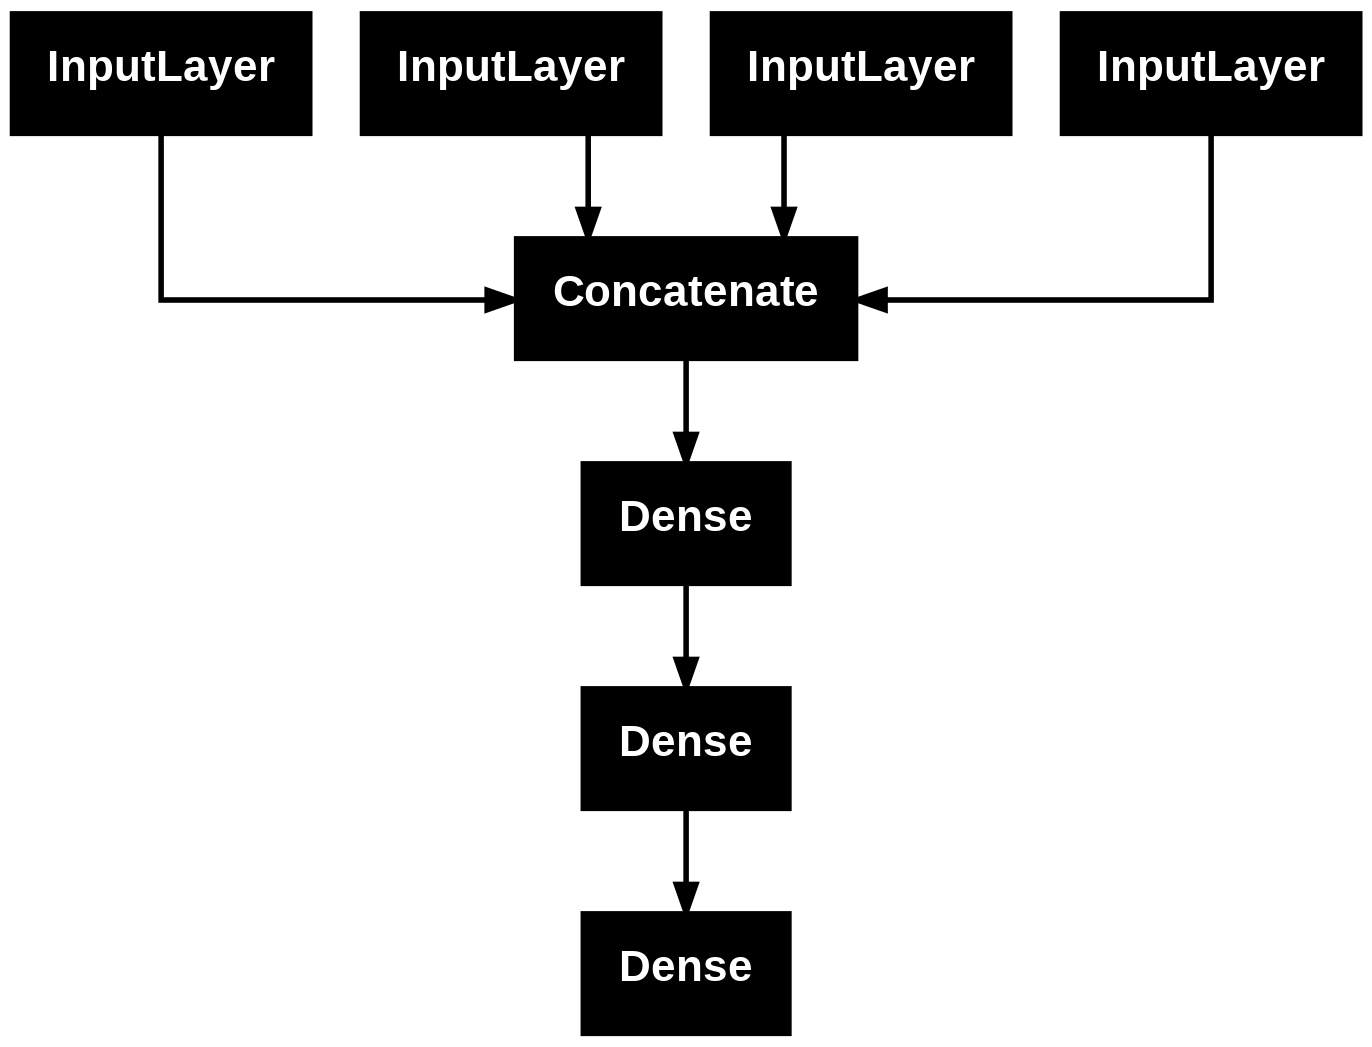

In [22]:
keras.utils.plot_model(model_concat)

In [23]:
model_concat.compile(optimizer="adam", metrics=["accuracy"], loss="sparse_categorical_crossentropy")

In [24]:
y_train.shape

(1097,)

In [25]:
model_concat.fit(x=[X0_train, X1_train, X2_train, X3_train], y=y_train.reshape(y_train.shape[0], 1), epochs=20)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2903 - loss: 21.0114
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6693 - loss: 3.5092
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7239 - loss: 1.7026
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7645 - loss: 1.1924
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8082 - loss: 0.7900
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8291 - loss: 0.7138
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8063 - loss: 0.7350
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8579 - loss: 0.6172
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8578 - loss: 0.5057
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8540 - loss: 0.4859
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8869 - loss: 0.5774
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8710 - l

In [26]:
model_concat.evaluate([X0_test, X1_test, X2_test, X3_test], y=y_test.reshape(y_test.shape[0], 1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8331 - loss: 1.3626  


[1.6203620433807373, 0.807272732257843]

In [27]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [28]:
predictions = model_concat.predict([X0_test, X1_test, X2_test, X3_test])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [29]:
predictions = np.argmax(predictions, axis=-1)

In [30]:
print("Accuracy: ", accuracy_score(y_test, predictions))
print("F1 score: ", f1_score(y_test, predictions, average="weighted"))
print(classification_report(y_test, predictions))

Accuracy:  0.8072727272727273
F1 score:  0.8098045833721315
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        31
           1       0.93      0.72      0.81        39
           2       0.79      0.87      0.83        30
           3       0.74      0.70      0.72        33
           4       0.88      1.00      0.94        15
           5       1.00      0.93      0.96        29
           6       0.83      0.83      0.83        23
           7       0.67      0.70      0.68        20
           8       0.88      0.88      0.88        26
           9       0.58      0.76      0.66        29

    accuracy                           0.81       275
   macro avg       0.82      0.82      0.81       275
weighted avg       0.82      0.81      0.81       275



In [31]:
cm = confusion_matrix(y_test, predictions)

In [32]:
import matplotlib.pyplot as plt

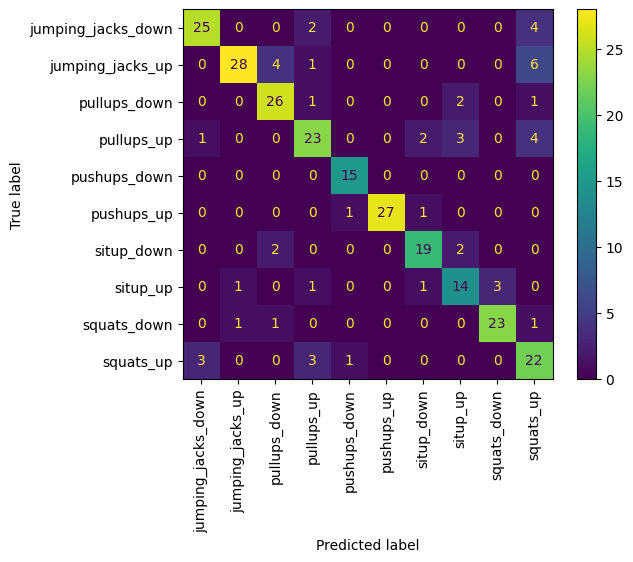

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

In [34]:
input_d = keras.Input(shape=(1, X0_train[0].shape[1],))
x_d = layers.Dense(100, activation="relu")(input_d)
x_d = layers.Dense(100, activation="relu")(x_d)

input_xyz = keras.Input(shape=(1, X1_train[0].shape[1],))
x_xyz = layers.Dense(100, activation="relu")(input_xyz)
x_xyz = layers.Dense(100, activation="relu")(x_xyz)

input_ang = keras.Input(shape=(1, X2_train[0].shape[1],))
x_ang = layers.Dense(100, activation="relu")(input_ang)
x_ang = layers.Dense(100, activation="relu")(x_ang)

input_land = keras.Input(shape=(1, X3_train[0].shape[1],))
x_land = layers.Dense(100, activation="relu")(input_land)
x_land = layers.Dense(100, activation="relu")(x_land)

x_concat = layers.concatenate([x_d, x_xyz, x_ang, x_land], axis=-1)

x = layers.Dense(100, activation='relu')(x_concat)
x = layers.Dense(50, activation='relu')(x)
x = layers.Dense(len(np.unique(y)), activation='softmax')(x)

model_branch = keras.Model(inputs=[input_d, input_xyz, input_ang, input_land], outputs=x)



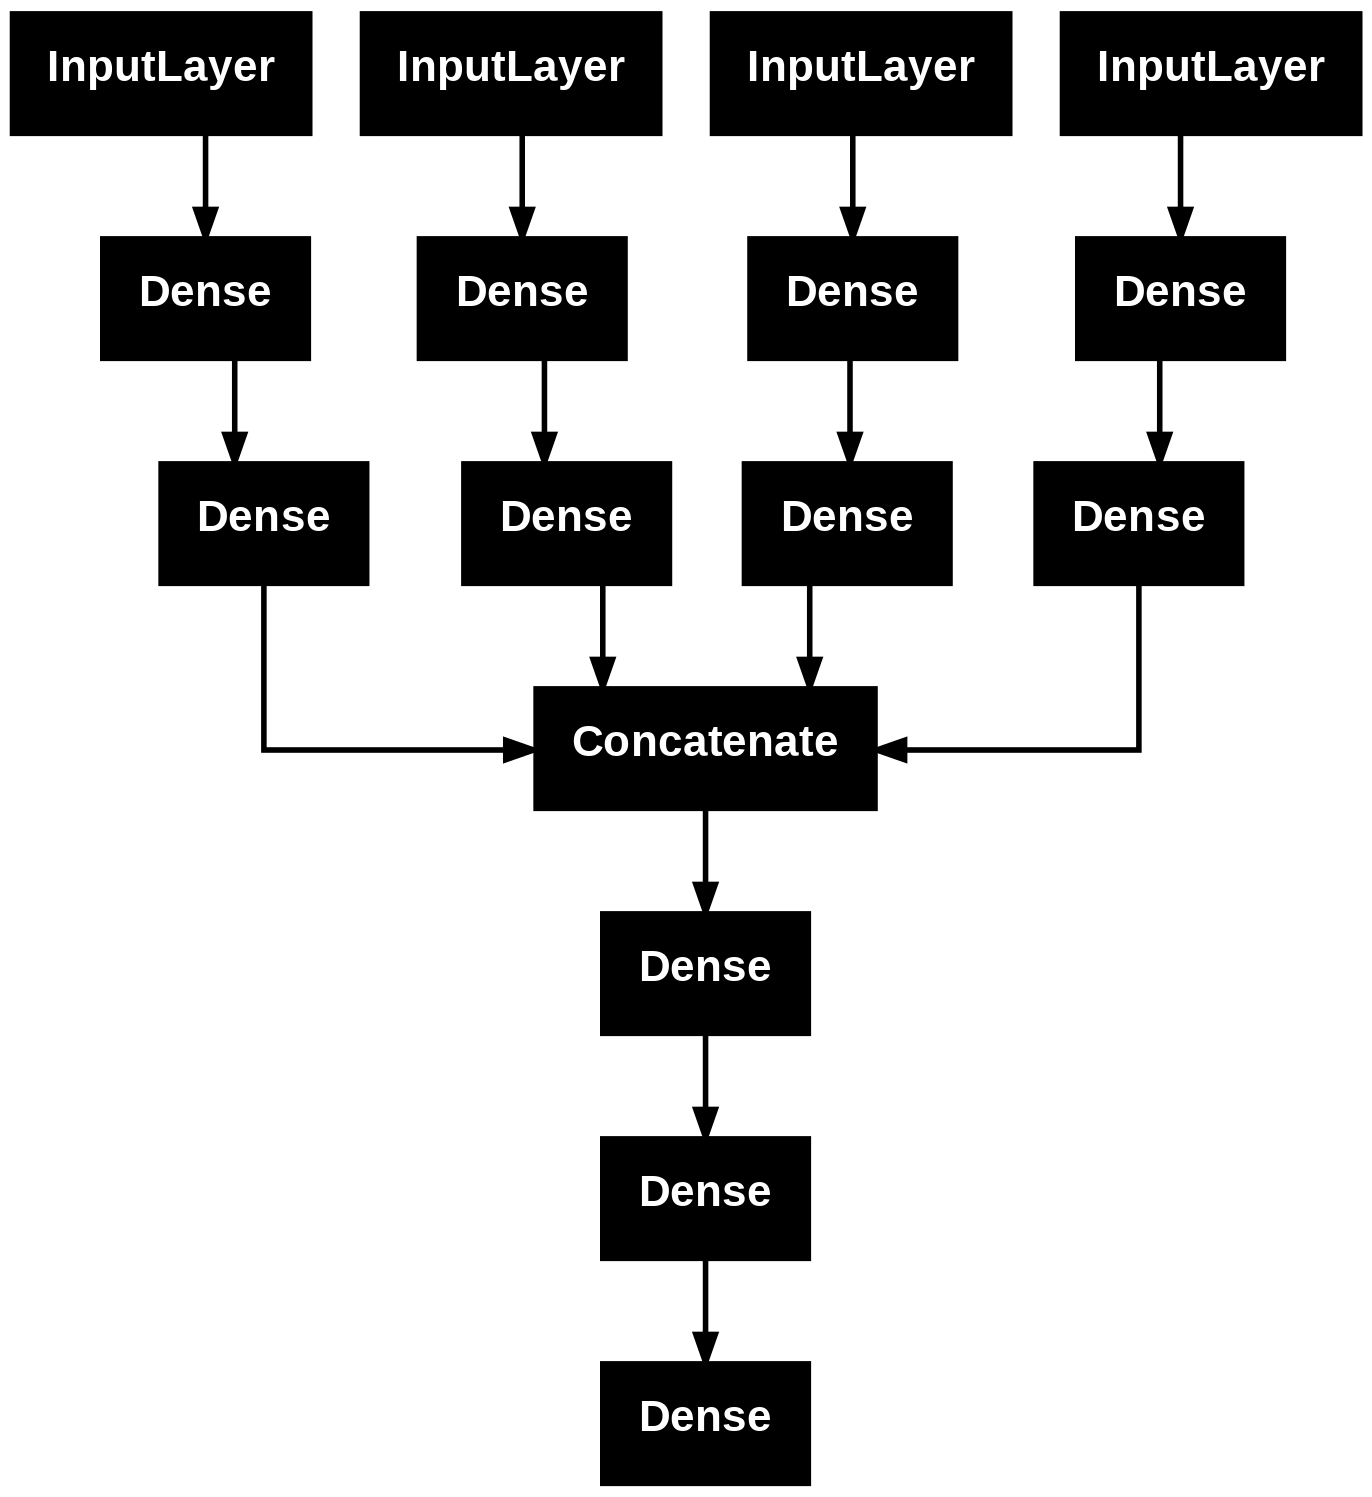

In [35]:
keras.utils.plot_model(model_branch)

In [36]:
model_branch.compile(optimizer="adam", metrics=["accuracy"], loss="sparse_categorical_crossentropy")

In [37]:
model_branch.fit(x=[X0_train, X1_train, X2_train, X3_train], y=y_train.reshape(y_train.shape[0], 1), epochs=20)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3595 - loss: 8.7241
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6582 - loss: 1.2000
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7663 - loss: 0.7646
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8036 - loss: 0.5875
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8322 - loss: 0.4829
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8762 - loss: 0.3749
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8971 - loss: 0.3298
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8863 - loss: 0.3033
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8927 - loss: 0.3293
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8743 - loss: 0.3647
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9252 - loss: 0.2113
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.92

In [38]:
predictions = model_branch.predict([X0_test, X1_test, X2_test, X3_test])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [39]:
predictions = np.argmax(predictions, axis=-1)

In [40]:
print("Accuracy: ", accuracy_score(y_test, predictions))
print("F1 score: ", f1_score(y_test, predictions, average="weighted"))
print(classification_report(y_test, predictions))

Accuracy:  0.8363636363636363
F1 score:  0.8364270191088373
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        31
           1       0.86      0.92      0.89        39
           2       0.92      0.77      0.84        30
           3       0.83      0.76      0.79        33
           4       0.88      1.00      0.94        15
           5       1.00      0.93      0.96        29
           6       0.86      0.83      0.84        23
           7       0.64      0.80      0.71        20
           8       0.82      0.88      0.85        26
           9       0.70      0.66      0.68        29

    accuracy                           0.84       275
   macro avg       0.84      0.84      0.84       275
weighted avg       0.84      0.84      0.84       275



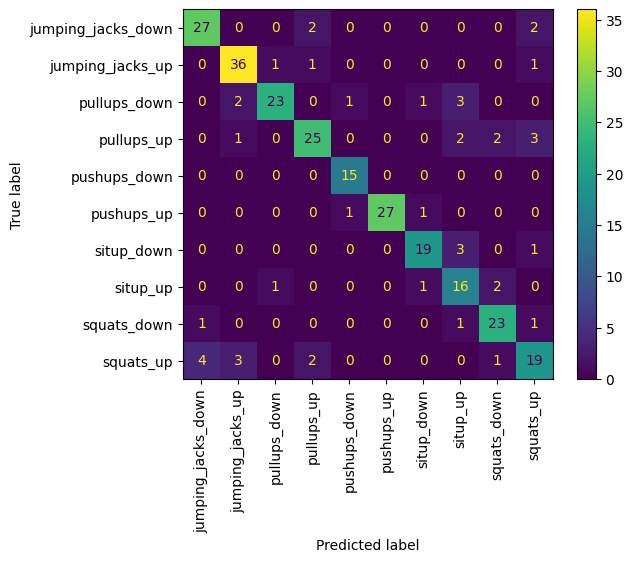

In [41]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()